In [72]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, f1_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, PredefinedSplit

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
import xgboost as xgb


In [73]:
df_train = pd.read_csv('../data/train_encoded_1.csv')
df_test = pd.read_csv('../data/test_encoded_1.csv')

In [74]:
df_test.shape

(6966, 70)

In [75]:
from sklearn.model_selection import train_test_split
df_train = df_train.drop(['Unnamed: 0'], axis = 1)
df_test = df_test.drop(['Unnamed: 0'], axis = 1)

train, valid = train_test_split(df_train, test_size=0.2)

In [76]:
X_train = train.drop(['price', 'price_per_sqft'], axis=1)
y_train = train['price_per_sqft']

X_valid = valid.drop(['price', 'price_per_sqft'], axis=1)
y_valid = valid['price_per_sqft']

df_test_size_sqft = df_test['size_sqft'].copy()
df_test= df_test.drop(['size_sqft'], axis=1)

np.random.seed(0)
idxs = np.arange(X_train.shape[0])
np.random.shuffle(idxs)

In [77]:
df_test.columns.difference(X_train.columns)


Index([], dtype='object')

In [78]:
scaler = preprocessing.MinMaxScaler().fit(X_train)
#X_train, X_valid = scaler.transform(X_train), scaler.transform(X_valid)

Training RMSE: 786217.351
Test RMSE: 706.860
Percentage error for training data 20.389706451477693
Percentage error for validation data 11.805653527601605


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

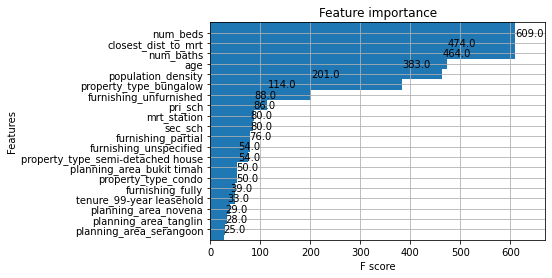

In [87]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, eval_metric=["error"])
xgb_model.fit(X_train, y_train)

# Predict labels for test data
yt_pred = xgb_model.predict(X_train)
yv_pred = xgb_model.predict(X_valid)

print('Training RMSE: {:.3f}'.format(mean_squared_error(yt_pred, y_train, squared=False)))
print('Test RMSE: {:.3f}'.format(mean_squared_error(yv_pred, y_valid, squared=False)))

print(f'Percentage error for training data {((abs(yt_pred - y_train)/y_train)*100).mean()}')
print(f'Percentage error for validation data {((abs(yv_pred - y_valid)/y_valid)*100).mean()}')

xgb.plot_importance(xgb_model, height = 5, max_num_features=20)



In [88]:
yTest = xgb_model.predict(df_test)


In [81]:

yTest = yTest * df_test_size_sqft
print(yTest)
yTest = pd.DataFrame(yTest.values, columns=['Predicted'], index=df_test.index)
print(yTest)

yTest.to_csv('../data/xgboost.csv')
yTest.shape


0       1.123802e+06
1       1.582596e+06
2       1.481279e+06
3       1.277788e+06
4       5.889185e+05
            ...     
6961    2.024763e+07
6962    1.199567e+07
6963    3.611521e+06
6964    5.278780e+05
6965    4.206647e+06
Name: size_sqft, Length: 6966, dtype: float64
         Predicted
0     1.123802e+06
1     1.582596e+06
2     1.481279e+06
3     1.277788e+06
4     5.889185e+05
...            ...
6961  2.024763e+07
6962  1.199567e+07
6963  3.611521e+06
6964  5.278780e+05
6965  4.206647e+06

[6966 rows x 1 columns]


(6966, 1)